In [17]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
!pip install seaborn scipy scikit-learn pandas matplotlib
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load dataset
data = pd.read_csv("dubai_properties.csv")  # Updated file name

# Step 3: Display basic info
data.info()
data.head()



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [6]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load dataset
data = pd.read_csv("dubai_properties.csv")  # Updated file name

# Step 3: Display basic info
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [18]:
# Function to compute descriptive statistics
def descriptive_stats(df, column):
    desc = df[column].describe()
    desc['variance'] = df[column].var()
    desc['skewness'] = df[column].skew()
    desc['kurtosis'] = df[column].kurt()
    return desc

# Example: Descriptive stats for 'Rent'
descriptive_stats(data, 'Rent')


count       7.374200e+04
mean        1.479250e+05
std         3.069658e+05
min         0.000000e+00
25%         5.499900e+04
50%         9.800000e+04
75%         1.700000e+05
max         5.500000e+07
variance    9.422802e+10
skewness    8.369225e+01
kurtosis    1.399808e+04
Name: Rent, dtype: float64

In [8]:
random_sample = data.sample(n=150, random_state=42)
descriptive_stats(random_sample, 'Rent')


count       1.500000e+02
mean        1.632282e+05
std         2.030180e+05
min         1.450000e+04
25%         5.125000e+04
50%         1.000000e+05
75%         1.749972e+05
max         1.400000e+06
variance    4.121632e+10
skewness    3.410522e+00
kurtosis    1.419763e+01
Name: Rent, dtype: float64

In [19]:
def systematic_sampling(df, step=5):
    indices = np.arange(0, len(df), step)
    return df.iloc[indices]

systematic_sample = systematic_sampling(data, step=5)
descriptive_stats(systematic_sample, 'Rent')


count       1.474900e+04
mean        1.505959e+05
std         4.980700e+05
min         0.000000e+00
25%         5.499900e+04
50%         9.999000e+04
75%         1.700000e+05
max         5.500000e+07
variance    2.480737e+11
skewness    9.122777e+01
kurtosis    9.977643e+03
Name: Rent, dtype: float64

In [10]:
def systematic_sampling(df, step=5):
    indices = np.arange(0, len(df), step)
    return df.iloc[indices]

systematic_sample = systematic_sampling(data, step=5)
descriptive_stats(systematic_sample, 'Rent')


count       1.474900e+04
mean        1.505959e+05
std         4.980700e+05
min         0.000000e+00
25%         5.499900e+04
50%         9.999000e+04
75%         1.700000e+05
max         5.500000e+07
variance    2.480737e+11
skewness    9.122777e+01
kurtosis    9.977643e+03
Name: Rent, dtype: float64

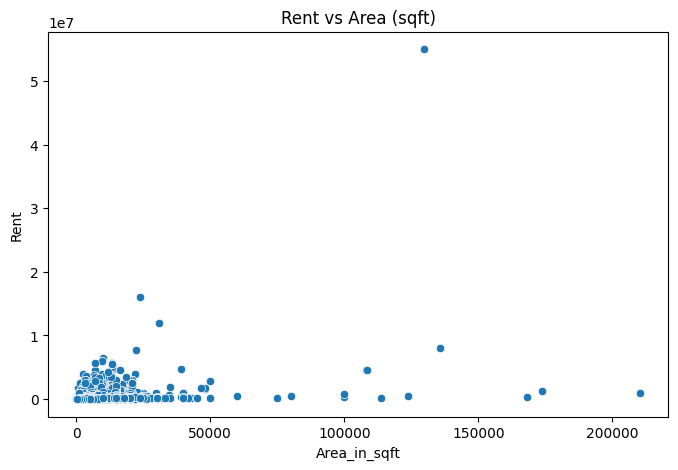

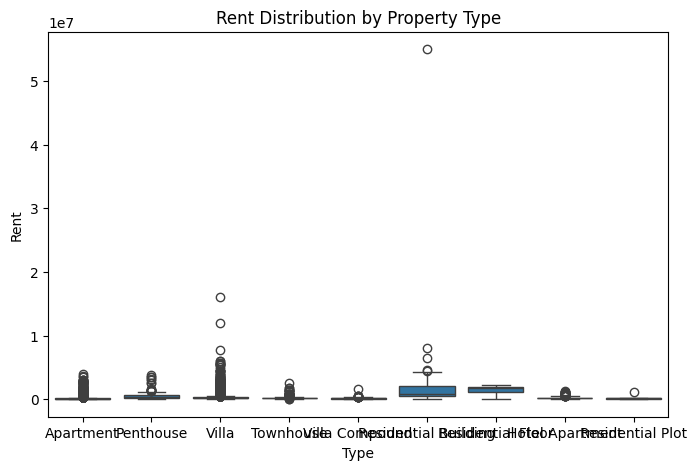

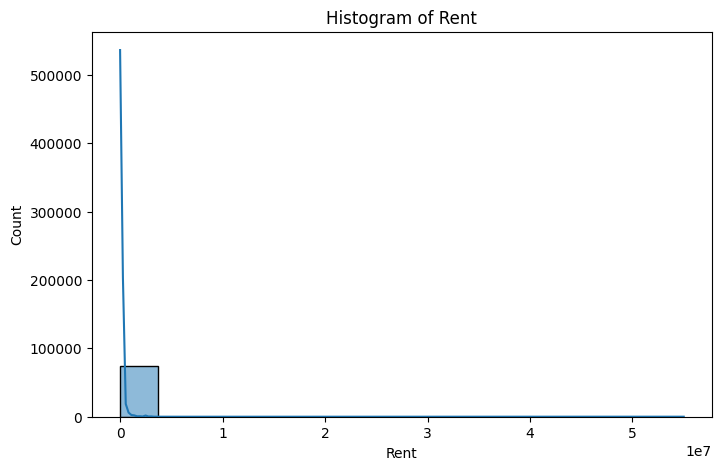

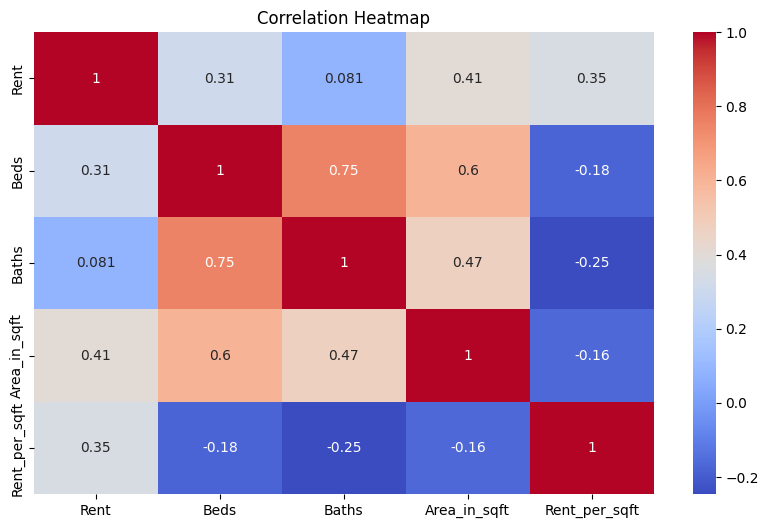

In [20]:
# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='Area_in_sqft', y='Rent', data=data)
plt.title('Rent vs Area (sqft)')
plt.show()

# Box plot
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Rent', data=data)
plt.title('Rent Distribution by Property Type')
plt.show()

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(data['Rent'], bins=15, kde=True)
plt.title('Histogram of Rent')
plt.show()

# Heatmap for correlation
plt.figure(figsize=(10,6))
sns.heatmap(data[['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [21]:
pearson_corr = data['Area_in_sqft'].corr(data['Rent'], method='pearson')
spearman_corr = data['Area_in_sqft'].corr(data['Rent'], method='spearman')
print(f"Pearson correlation: {pearson_corr}")
print(f"Spearman correlation: {spearman_corr}")


Pearson correlation: 0.40551714970526626
Spearman correlation: 0.5910258803752542


In [22]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Type'], data['Rent_category'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p}")


Chi-square statistic: 14890.576683757972, p-value: 0.0


In [15]:
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(random_sample['Rent'], data['Rent'].mean())
print(f"T-statistic: {t_stat}, p-value: {p_value}")


T-statistic: 0.9231961824119745, p-value: 0.3573975490763135


R-squared: 0.1438876810664962
MSE: 238326594984.8278


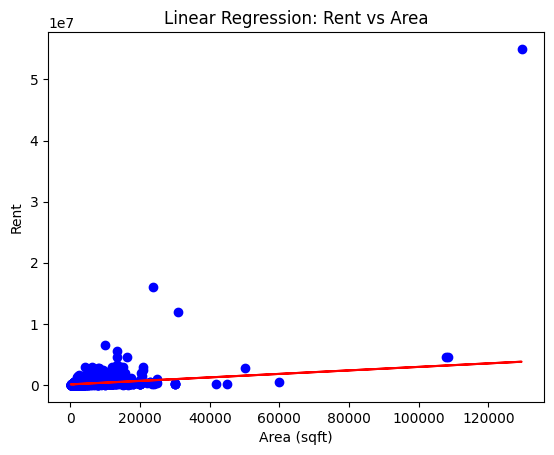

In [16]:
X = data[['Area_in_sqft']]
y = data['Rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f"R-squared: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title("Linear Regression: Rent vs Area")
plt.xlabel("Area (sqft)")
plt.ylabel("Rent")
plt.show()


In [26]:
# Keep only numeric columns for multiple regression
numeric_cols = ['Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft']  # Example independent vars
X_multi = data[numeric_cols]

# Target variable
y_multi = data['Rent']


In [27]:
# Select categorical columns
cat_cols = ['Type', 'Rent_category', 'Frequency', 'Furnishing', 'Purpose', 'Location', 'City']

# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

# Now split features and target
X_multi = data_encoded.drop('Rent', axis=1)
y_multi = data_encoded['Rent']


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select numeric columns and categorical columns
numeric_features = ['Area_in_sqft', 'Beds', 'Baths']
categorical_features = ['Type', 'Furnishing', 'Frequency', 'Location', 'City']

# One-hot encode categorical features
X_cat = pd.get_dummies(data[categorical_features], drop_first=True)

# Combine numeric and encoded categorical features
X_multi = pd.concat([data[numeric_features], X_cat], axis=1)
y_multi = data['Rent']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Fit multiple linear regression
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

# Predict
y_pred_multi = lr_multi.predict(X_test)

# Evaluation
print(f"R-squared: {r2_score(y_test, y_pred_multi)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_multi)}")


R-squared: 0.2029265211064729
MSE: 221891221486.04456


In [31]:
# Check column types
data.dtypes


Address                    object
Rent                        int64
Beds                        int64
Baths                       int64
Type                       object
Area_in_sqft                int64
Rent_per_sqft             float64
Rent_category              object
Frequency                  object
Furnishing                 object
Purpose                    object
Posted_date                object
Age_of_listing_in_days      int64
Location                   object
City                       object
Latitude                  float64
Longitude                 float64
dtype: object

In [23]:
# Step 0: Check for missing values
print(data_encoded.isnull().sum())

# Step 1: Option 1 – Drop rows with any NaN
data_clean = data_encoded.dropna()

# Step 2: Define features and target
X = data_clean.drop('Rent', axis=1)
y = data_clean['Rent']

# Step 3: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = lr.predict(X_test)
print(f"R-squared: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")


Rent                   0
Beds                   0
Baths                  0
Area_in_sqft           0
Rent_per_sqft          0
                      ..
City_Dubai             0
City_Fujairah          0
City_Ras Al Khaimah    0
City_Sharjah           0
City_Umm Al Quwain     0
Length: 466, dtype: int64
R-squared: 0.5135699301217154
MSE: 37950756861.40597


In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # or 'mean' for numeric columns
X_imputed = imputer.fit_transform(X)


In [26]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 194809.53996507966


In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Encode target
le = LabelEncoder()
data['Rent_category_encoded'] = le.fit_transform(data['Rent_category'])

X_class = data[['Area_in_sqft', 'Beds', 'Baths']]  # Add more numeric features
y_class = data['Rent_category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train, predict, evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-"*40)


Logistic Regression Accuracy: 0.5566
Confusion Matrix:
[[2847  425 1667]
 [ 552 3322  909]
 [1029 1958 2040]]
----------------------------------------
KNN Accuracy: 0.7116
Confusion Matrix:
[[3876  201  862]
 [ 317 3622  844]
 [1084  945 2998]]
----------------------------------------
Naive Bayes Accuracy: 0.4741
Confusion Matrix:
[[1480 1750 1709]
 [  29 4327  427]
 [ 684 3158 1185]]
----------------------------------------
Decision Tree Accuracy: 0.7367
Confusion Matrix:
[[3792  220  927]
 [ 215 3830  738]
 [ 822  962 3243]]
----------------------------------------


In [39]:
# --- Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regression & Classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# --- Load Dataset ---
df = pd.read_csv('dubai_properties.csv')
print(df.head())
print(df.columns)

# --- 1. Simple & Multiple Linear Regression ---
# Replace with actual numeric features and target
X = df[['sizeMin', 'bedrooms', 'bathrooms']]   # example numeric features
y = df['Rent']                                  # example target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Metrics
print("Linear Regression Results:")
print(f"R-squared: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X_test['sizeMin'], y_test, color='blue', alpha=0.5, label='Actual Rent')
plt.scatter(X_test['sizeMin'], y_pred, color='red', alpha=0.5, label='Predicted Rent')
plt.xlabel('Size (sqft)')
plt.ylabel('Rent')
plt.title('Linear Regression: Rent vs Size')
plt.legend()
plt.show()

# --- 2. Classification ---
# Example: convert rent into categories
df['Rent_Category'] = pd.qcut(df['Rent'], q=3, labels=['Low', 'Medium', 'High'])
le = LabelEncoder()
df['Rent_Category_encoded'] = le.fit_transform(df['Rent_Category'])

# Features & target
features = ['sizeMin', 'bedrooms', 'bathrooms', 'floors', 'parking', 'pool']  # update if needed
target = 'Rent_Category_encoded'

X_cls = df[features]
y_cls = df[target]

# Split and scale
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_cls = scaler.fit_transform(X_train_cls)
X_test_cls = scaler.transform(X_test_cls)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_cls, y_train_cls)
y_pred_log = logreg.predict(X_test_cls)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_cls, y_train_cls)
y_pred_knn = knn.predict(X_test_cls)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_cls, y_train_cls)
y_pred_nb = nb.predict(X_test_cls)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_cls, y_train_cls)
y_pred_dt = dt.predict(X_test_cls)

# Accuracy & Confusion Matrices
models = {'Logistic Regression': y_pred_log, 'KNN': y_pred_knn, 'Naive Bayes': y_pred_nb, 'Decision Tree': y_pred_dt}
for name, pred in models.items():
    print(f"{name} Accuracy: {accuracy_score(y_test_cls, pred)}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test_cls, pred)}\n")

# --- 3. Clustering ---

# Use numeric features only
X_cluster = df[features]

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster)
df['KMeans_Cluster'] = clusters

# PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_cluster)
plt.figure(figsize=(8,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=clusters, palette='Set2')
plt.title('K-Means Clustering (PCA Projection)')
plt.show()

# Hierarchical Clustering
linked = linkage(X_cluster, method='ward')
plt.figure(figsize=(10,5))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

agg = AgglomerativeClustering(n_clusters=3)
df['Agglomerative_Cluster'] = agg.fit_predict(X_cluster)
plt.figure(figsize=(8,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['Agglomerative_Cluster'], palette='Set1')
plt.title('Agglomerative Clustering (PCA Projection)')
plt.show()


                                             Address    Rent  Beds  Baths  \
0  The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2            Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   
3  Marina Heights, Marina Square, Al Reem Island,...  220000     3      4   
4                    West Yas, Yas Island, Abu Dhabi  350000     5      7   

        Type  Area_in_sqft  Rent_per_sqft Rent_category Frequency  \
0  Apartment          1785      69.467787        Medium    Yearly   
1  Apartment          1422      98.452883        Medium    Yearly   
2  Apartment          1314      75.342466        Medium    Yearly   
3  Penthouse          3843      57.246942          High    Yearly   
4      Villa          6860      51.020408          High    Yearly   

    Furnishing   Purpose Posted_date  Age_of_listing_in_days        Location  \
0  Unfurnished  For Rent  2024-03-07      

KeyError: "None of [Index(['sizeMin', 'bedrooms', 'bathrooms'], dtype='object')] are in the [columns]"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
# Load the Dubai properties dataset
df = pd.read_csv('dubai_properties.csv')

# Check the column names and first few rows
print(df.columns)
print(df.head())


Index(['Address', 'Rent', 'Beds', 'Baths', 'Type', 'Area_in_sqft',
       'Rent_per_sqft', 'Rent_category', 'Frequency', 'Furnishing', 'Purpose',
       'Posted_date', 'Age_of_listing_in_days', 'Location', 'City', 'Latitude',
       'Longitude'],
      dtype='object')
                                             Address    Rent  Beds  Baths  \
0  The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2            Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   
3  Marina Heights, Marina Square, Al Reem Island,...  220000     3      4   
4                    West Yas, Yas Island, Abu Dhabi  350000     5      7   

        Type  Area_in_sqft  Rent_per_sqft Rent_category Frequency  \
0  Apartment          1785      69.467787        Medium    Yearly   
1  Apartment          1422      98.452883        Medium    Yearly   
2  Apartment          1314      75.342466        Medium    Ye

R-squared: 0.1540
MSE: 235510201249.87


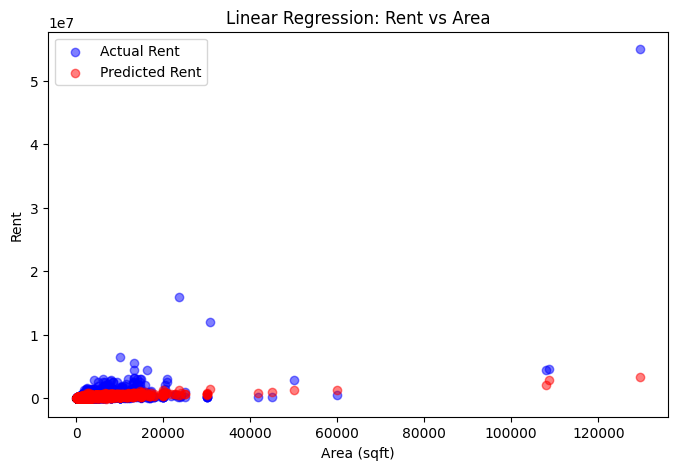

In [3]:
# Define numeric features and target
numeric_features = ['Area_in_sqft', 'Beds', 'Baths']
target = 'Rent'

X = df[numeric_features]
y = df[target]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Evaluation
print(f"R-squared: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

# Plot actual vs predicted rent
plt.figure(figsize=(8,5))
plt.scatter(X_test['Area_in_sqft'], y_test, color='blue', alpha=0.5, label='Actual Rent')
plt.scatter(X_test['Area_in_sqft'], y_pred, color='red', alpha=0.5, label='Predicted Rent')
plt.xlabel('Area (sqft)')
plt.ylabel('Rent')
plt.title('Linear Regression: Rent vs Area')
plt.legend()
plt.show()


In [4]:
logreg = LogisticRegression()
logreg.fit(X_train_cls, y_train_cls)
y_pred_logreg = logreg.predict(X_test_cls)

print("Logistic Regression Accuracy:", accuracy_score(y_test_cls, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_logreg))


NameError: name 'X_train_cls' is not defined

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode target
le = LabelEncoder()
df['Rent_category_encoded'] = le.fit_transform(df['Rent_category'])

# Features & target
X_cls = df[['Area_in_sqft', 'Beds', 'Baths']]  # numeric features
y_cls = df['Rent_category_encoded']

# Scale features
scaler = StandardScaler()
X_cls_scaled = scaler.fit_transform(X_cls)

# Split data
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls_scaled, y_cls, test_size=0.2, random_state=42
)


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode target
le = LabelEncoder()
df['Rent_category_encoded'] = le.fit_transform(df['Rent_category'])

# Features & target
X_cls = df[['Area_in_sqft', 'Beds', 'Baths']]  # numeric features
y_cls = df['Rent_category_encoded']

# Scale features
scaler = StandardScaler()
X_cls_scaled = scaler.fit_transform(X_cls)

# Split data
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls_scaled, y_cls, test_size=0.2, random_state=42
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train_cls, y_train_cls)
y_pred_logreg = logreg.predict(X_test_cls)

print("Logistic Regression Accuracy:", accuracy_score(y_test_cls, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_logreg))


Logistic Regression Accuracy: 0.5565801071259069
Confusion Matrix:
 [[2847  425 1667]
 [ 552 3322  909]
 [1029 1958 2040]]


In [8]:
# Encode 'Rent_category' into numeric values
le = LabelEncoder()
df['Rent_category_encoded'] = le.fit_transform(df['Rent_category'])

# Check first 5 values
print(df[['Rent_category', 'Rent_category_encoded']].head())


  Rent_category  Rent_category_encoded
0        Medium                      2
1        Medium                      2
2        Medium                      2
3          High                      0
4          High                      0


In [9]:
# Select numeric features for classification
features = ['Area_in_sqft', 'Beds', 'Baths']  # you can add more numeric features if needed
X = df[features]
y = df['Rent_category_encoded']

# Confirm
print(X.head())
print(y.head())


   Area_in_sqft  Beds  Baths
0          1785     3      4
1          1422     3      4
2          1314     2      3
3          3843     3      4
4          6860     5      7
0    2
1    2
2    2
3    0
4    0
Name: Rent_category_encoded, dtype: int64


In [10]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shapes
print(X_train_cls.shape, X_test_cls.shape)
print(y_train_cls.shape, y_test_cls.shape)


(58993, 3) (14749, 3)
(58993,) (14749,)


In [11]:
# KNN Classifier (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_cls, y_train_cls)
y_pred_knn = knn.predict(X_test_cls)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test_cls, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_knn))


KNN Accuracy: 0.7116414672181165
Confusion Matrix:
 [[3876  201  862]
 [ 317 3622  844]
 [1084  945 2998]]


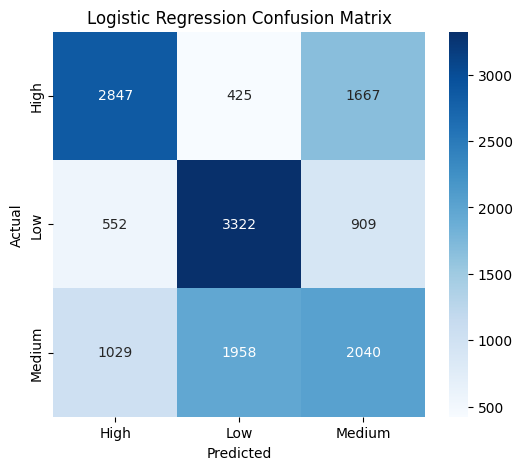

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test_cls, y_pred_logreg)

plt.figure(figsize=(6,5))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


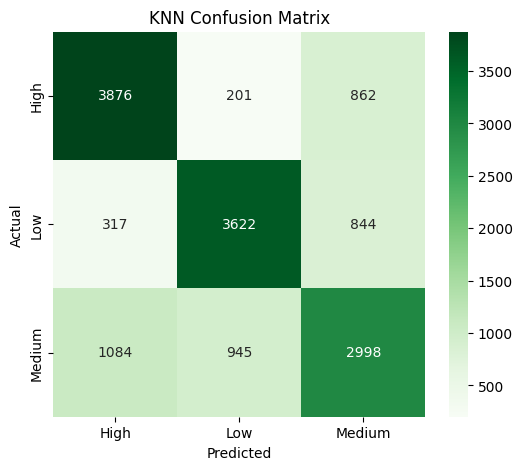

In [13]:
# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test_cls, y_pred_knn)

plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()


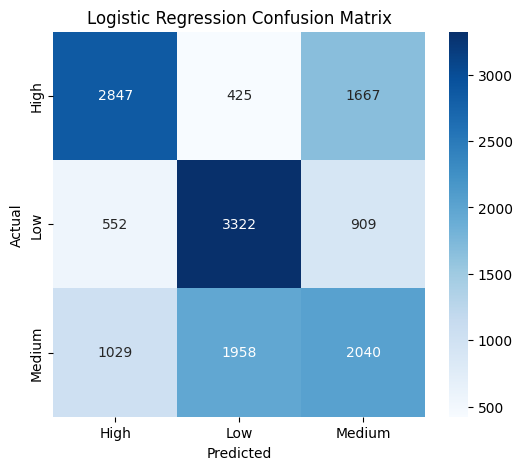

In [14]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_logreg), annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


In [15]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_nb), annot=True, fmt='d', cmap='Oranges', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naïve Bayes Confusion Matrix')
plt.show()


NameError: name 'y_pred_nb' is not defined

<Figure size 600x500 with 0 Axes>

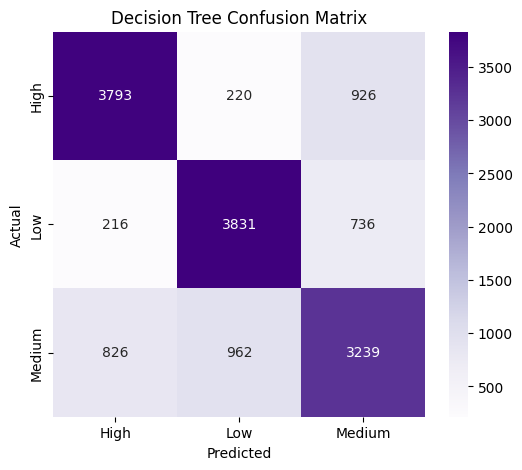

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_cls, y_train_cls)
y_pred_dt = dt.predict(X_test_cls)

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_dt), annot=True, fmt='d', cmap='Purples',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()



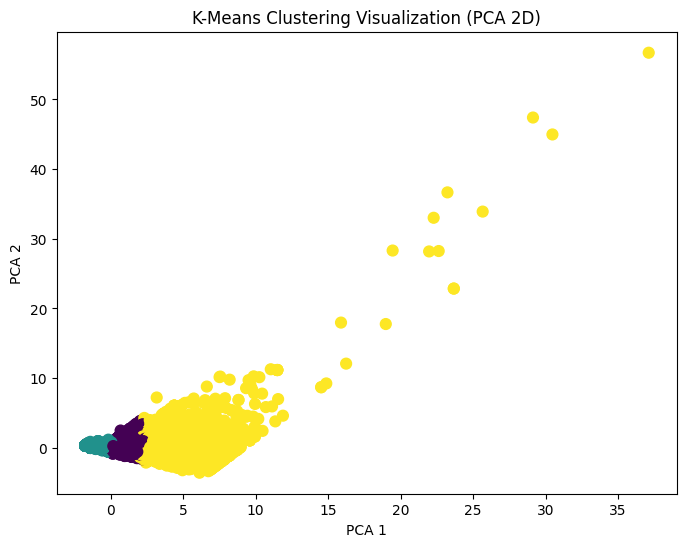

In [4]:
# -------------------------------------------------------------
# 1. Import Libraries
# -------------------------------------------------------------
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 2. Load Dataset
# -------------------------------------------------------------
# Replace your file name here
df = pd.read_csv("dubai_properties.csv")

# -------------------------------------------------------------
# 3. Select Features for Clustering
# -------------------------------------------------------------
X_cluster = df[['Area_in_sqft', 'Beds', 'Baths']]

# -------------------------------------------------------------
# 4. Scale the Data
# -------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# -------------------------------------------------------------
# 5. Apply K-Means Clustering
# -------------------------------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# -------------------------------------------------------------
# 6. PCA for 2D Visualization
# -------------------------------------------------------------
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

# -------------------------------------------------------------
# 7. Plot K-Means Clusters
# -------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=df['Cluster'], s=60)
plt.title("K-Means Clustering Visualization (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


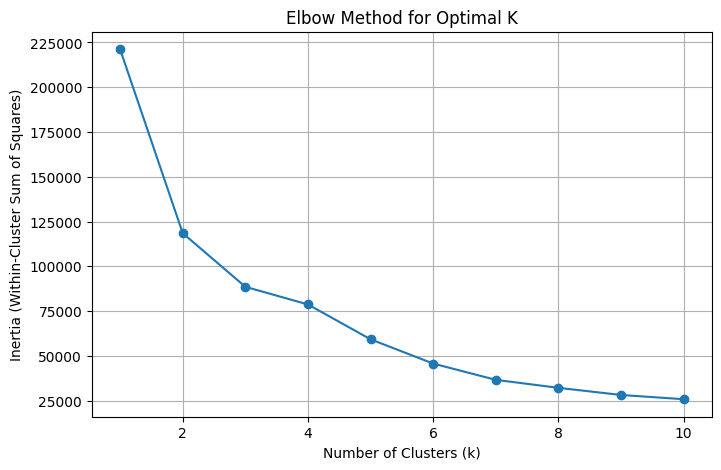

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# -----------------------------------------
# Elbow Method to find optimal K
# -----------------------------------------

inertia_values = []
K_range = range(1, 11)   # Try k = 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


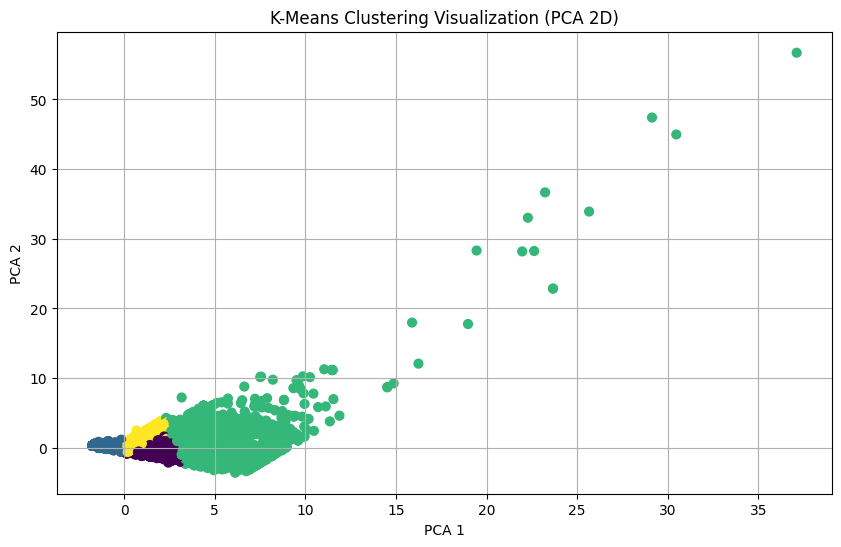

In [6]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -----------------------------
# 2. Select Features for Clustering
# -----------------------------
X_cluster = df[['Area_in_sqft', 'Beds', 'Baths']]

# -----------------------------
# 3. Scale the Data
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# -----------------------------
# 4. Apply K-Means (k = 4)
# -----------------------------
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# -----------------------------
# 5. Apply PCA (Convert to 2D)
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# -----------------------------
# 6. Visualization (2D Scatter Plot)
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    c=clusters, 
    s=40
)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("K-Means Clustering Visualization (PCA 2D)")
plt.grid(True)
plt.show()
